<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открыть-датасет-и-изучить-его" data-toc-modified-id="Открыть-датасет-и-изучить-его-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открыть датасет и изучить его</a></span></li><li><span><a href="#Проверка-правильности-данных-эффективности-обогащения" data-toc-modified-id="Проверка-правильности-данных-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка правильности данных эффективности обогащения</a></span></li><li><span><a href="#Анализ-отсутствующих-признаков" data-toc-modified-id="Анализ-отсутствующих-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ отсутствующих признаков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-Au,-Ag-и-Pb-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-Au,-Ag-и-Pb-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация Au, Ag и Pb на различных этапах очистки</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота

Предприятие "Цифра", занимающееся разработкой решений для эффективной работы промышленных предприятий, нуждается в помощи. <br>
Необходимо построить модель, способную предсказать коэффициент восстановления золота из золотосодержащей руды. В распоряжении имеются данные с параметрами добычи и очистки. <br>
<br>
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. <br>
<br>
Проект имеет следующие этапы:
- Подготовка данных; <br>
- Исследовательский анализ данных; <br>
- Построение и обучение модели. <br>

**Особенности проекта** <br>
- Два целевых признака: эффективность обогащения чернового и финального концентрата; <br>
- В качестве метрики оценки качества модели используем *sMAPE* (*Symmetric Mean Absolute Percentage Error*), рассчитываемый следующим образом: <br>
$$ \frac{1}{N}\sum_{i=1}^{N}\frac{|y_{i}-\hat{y_{i}}|}{|y_{i}|+|\hat{y_{i}}|} $$ <br>
sMAPE необходимо вычислить для чернового и финального этапа. Итоговая sMAPE вычисляется следующим образом: <br>
<h1><center>sMAPE (Итоговая) = 0.25 * sMAPE (черновая) + 0.75 * sMAPE (финальная)</center></h1>

In [1]:
# Импортируемые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [2]:
# Используемые константы
STATE = np.random.RandomState(12345)

In [3]:
import warnings
warnings.simplefilter("ignore")

## Подготовка данных

Наша задача на этом этапе - изучить и подготовить данные для дальнейше работы с ними. Необходимо проверить их на наличие пропусков и дубликатов а также постараться объяснить их наличие и обработать их.

### Открыть датасет и изучить его

За нас уже разделили данные на тестовую и тренировочную выборки.

In [4]:
data_train = pd.read_csv('datasets/gold_industry_train.csv') # загружаем тренировочный датасет
data_test = pd.read_csv('datasets/gold_industry_test.csv') # загружаем тестовый датасет
data_full = pd.read_csv('datasets/gold_industry_full.csv') # загружаем изначальный датасет
pd.set_option('display.max_columns', None) # убираем ограничение на количество отображаемых столбцов в DataFrame

In [5]:
display(data_full.sample(5))
data_full.info()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
11409,2017-07-19 15:59:59,11.873151,12.356466,5.976888,40.822931,511.017112,51.002520,15.413257,6.198355,998.655977,-400.045199,1196.853279,-501.204316,1200.831536,-500.615770,999.682798,-500.448186,999.658909,-499.569982,900.411555,-502.415021,15.413119,6.194868,54117.132463,2996.362785,2996.542140,1.986511,20.599910,14.399734,9.303357,34.013400,91.800009,2.067555,5.670290,0.718067,16.980269,252.831455,9.017192,8.255001,1.427451,1551.998783,-500.331316,1549.712493,-507.194532,1490.114746,-499.359371,1550.585097,-498.538865,30.107012,10.953651,12.845215,17.667037,7.773899,20.732992,6.467104,9.469695,21.997189,-499.383837,19.942257,-500.123569,24.978981,-500.080889,17.977660,-500.104618,1.079872e-16,-799.704829,2.489718e-17,-799.852978,11.054884,-497.642993,7.277496,-499.897722,12.012010,-499.181272,20.163214,15.807652,10.405020,10.607722,38.791118,6.276844,9.075987,8.890785,47.471002,7.297109,13.499516,4.798724,13.576696
5995,2016-11-05 07:59:59,9.652368,9.980459,2.996358,37.569632,425.646768,47.847849,13.000869,6.000049,999.829001,-499.941168,1099.815114,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [6]:
print('Размер датасета', data_full.shape)
print('Размер тренировочной выборки', data_train.shape)
print('Размер тестовой выборки', data_test.shape)

Размер датасета (19439, 87)
Размер тренировочной выборки (14579, 87)
Размер тестовой выборки (4860, 53)


У нас в распоряжении 19439 строк и 87 столбцов, включающих признаки и два таргета: <br>
1) *rougher.output.recovery* - эффективность обогащения чернового концентрата; <br>
2) *final.output.recovery* - эффективность обогащения финального концентрата. <br>
Можно заметить, что за нас уже разделили выборки на тестовую и тренировочную. Количество столбцов в них отличается, чуть позже мы подробнее разберем этот момент.

### Проверка правильности данных эффективности обогащения

Проверим, правильно ли рассчитана эффективность обогащения. Для этого напишем функцию, рассчитывающая эффективность и сравним получившиеся значения со значениями в данных.

In [7]:
our_series = data_test['date']  # сохраняем индексы тренировочной выборки

Так как индексы в каждом датафрейме начинаются с единицы, в роли индексов выступает столбец *date*.

In [8]:
def recovery_calc(row): # Функция расчета восстановления золота
    # Числитель
    numerator = row['rougher.output.concentrate_au'] * (row['rougher.input.feed_au'] - row['rougher.output.tail_au'])
    # Знаменатель
    denominator = row['rougher.input.feed_au'] * (row['rougher.output.concentrate_au'] - row['rougher.output.tail_au'])
    return numerator / denominator * 100

In [9]:
recovery_calculated = pd.Series([ recovery_calc(row) for i, row in data_full.query('date in @our_series').iterrows() ])

In [10]:
recovery_abs_difference = abs(
    recovery_calculated.subtract(data_full.query('date in @our_series')['rougher.output.recovery'].reset_index(drop=True)))
recovery_mae = sum(recovery_abs_difference) / len(recovery_calculated)
print(f'MAE для rougher.output.recovery: {recovery_mae}')

MAE для rougher.output.recovery: 9.971721665127085e-15


Эффективность обогащения рассчитана верно. Идем дальше.

### Анализ отсутствующих признаков

Количество столбцов в тренировочной выборке и тестовой отличается. Посмотрим, что за этим стоит, а также проведем проверку на дубликаты и отсутствующие значения.

In [11]:
mis_features = list(set(data_full.columns)-set(data_test.columns)) # создаем список отсутствующих в тестовой выборке столбцов

In [12]:
print('Количество отсутствующих признаков:', len(mis_features))
sorted(mis_features)

Количество отсутствующих признаков: 34


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют целевые столбцы: *rougher.output.recovery*, *final.output.recovery*, а также еще 32 столбца признаков. Среди них расчетные *calculation* и выходные *output*, которые вычисляются после выполнения технологического процесса, но ни как не в ходе выполнения самого процесса.

Теперь рассмотрим пустые значения в тренировочной и тестовой выборках.

In [13]:
nulls_test = data_test.isna().sum().sort_values(ascending=False)
nulls_test.loc[nulls_test > 0]

secondary_cleaner.state.floatbank2_a_air      126
rougher.input.floatbank11_xanthate             46
rougher.input.feed_size                        44
primary_cleaner.input.xanthate                 43
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
primary_cleaner.input.depressant                9
rougher.input.floatbank11_sulfate               8
rougher.state.floatbank10_e_air                 7
rougher.input.feed_rate                         4
rougher.input.floatbank10_sulfate               3
primary_cleaner.state.floatbank8_d_air          2
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_d_level        1
secondary_cleaner.state.floatbank3_a_level      1
secondary_cleaner.state.floatbank2_a_level      1
secondary_cleaner.state.floatbank2_b_air        1
secondary_cleaner.state.floatbank2_b_level      1
secondary_cleaner.state.floatbank3_a_air        1
secondary_cleaner.state.floatbank4_a_air        1


Отсутствующих значений не так много, и их можно удалить из тестовой выборки.

In [14]:
data_test = data_test.dropna(axis=0)

Перейдем к тренировочной выборке.

In [15]:
nulls_train = data_train.isna().sum().sort_values(ascending=False)
#nulls_train.loc[nulls_train > 10]
nulls_train

secondary_cleaner.output.tail_sol           920
rougher.state.floatbank10_e_air             429
rougher.input.floatbank11_xanthate          407
primary_cleaner.output.concentrate_sol      265
final.output.concentrate_sol                192
                                           ... 
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_level      0
primary_cleaner.output.concentrate_au         0
primary_cleaner.state.floatbank8_b_level      0
Length: 87, dtype: int64

In [16]:
nulls_train.sum()

3050

С тренировочной выборкой ситуация немного другая. Отсутствующих значений больше 4 тысяч, а это около 30 % датасета. Сделаем так: если в столбце отсутствует меньше 10 значений, удалим их. Если больше - заполним предыдущим значением в столбце. Этот метод называется *Last observation carried forward* (*LOCF*), и он здесь уместен, так как в качестве индекса исползуется время, и близкие по времени (а значит и по индексу) значения похожи.

In [17]:
for column in nulls_train.loc[nulls_train > 10].index:
    data_train[column] = data_train[column].fillna(method='ffill')

In [18]:
data_train = data_train.dropna(axis=0)

In [19]:
data_train.isna().sum().sum()

0

In [20]:
data_test = data_test.dropna(axis=0)

In [21]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

0
0


## Анализ данных

В этом разделе мы будем анализировать данные: посмотрим на концентрации различных веществ по стадиям очистки и сравним распределения размеров гранул сырья.

### Концентрация Au, Ag и Pb на различных этапах очистки

In [22]:
concentration = pd.DataFrame(columns=['element', 'stage', 'concentration']) # создаем датафрейм, в который занесем концентрации

In [23]:
ag0 = ['ag', 'input', data_full['rougher.input.feed_ag'].mean()]
ag1 = ['ag', 'rougher', data_full['rougher.output.concentrate_ag'].mean()]
ag2 = ['ag', 'primary', data_full['primary_cleaner.output.concentrate_ag'].mean()]
ag3 = ['ag', 'secondary', data_full['final.output.concentrate_ag'].mean()]

In [24]:
pb0 = ['pb', 'input', data_full['rougher.input.feed_pb'].mean()]
pb1 = ['pb', 'rougher', data_full['rougher.output.concentrate_pb'].mean()]
pb2 = ['pb', 'primary', data_full['primary_cleaner.output.concentrate_pb'].mean()]
pb3 = ['pb', 'secondary', data_full['final.output.concentrate_pb'].mean()]

In [25]:
au0 = ['au', 'input', data_full['rougher.input.feed_au'].mean()]
au1 = ['au', 'rougher', data_full['rougher.output.concentrate_au'].mean()]
au2 = ['au', 'primary', data_full['primary_cleaner.output.concentrate_au'].mean()]
au3 = ['au', 'secondary', data_full['final.output.concentrate_au'].mean()]

In [26]:
concentration.loc[0] = ag0
concentration.loc[1] = ag1
concentration.loc[2] = ag2
concentration.loc[3] = ag3

concentration.loc[4] = pb0
concentration.loc[5] = pb1
concentration.loc[6] = pb2
concentration.loc[7] = pb3

concentration.loc[8] = au0
concentration.loc[9] = au1
concentration.loc[10] = au2
concentration.loc[11] = au3

In [27]:
concentration.head()

,element,stage,concentration
0,ag,input,8.794927
1,ag,rougher,11.994759
2,ag,primary,8.442408
3,ag,secondary,5.168470
4,pb,input,3.598085


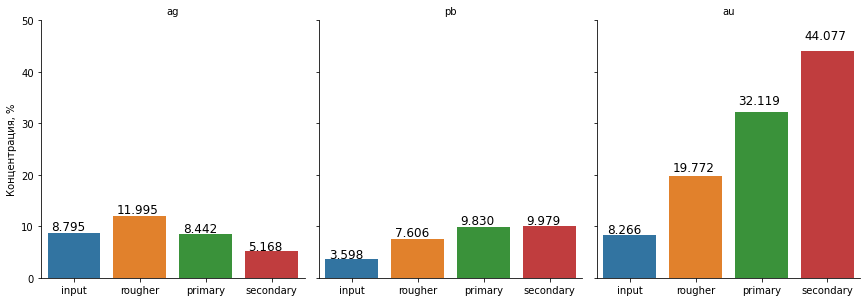

In [28]:
g = sns.catplot(
    data=concentration, x='stage', y='concentration', col='element', kind='bar', height=4.5, aspect=.9
)
g.set_axis_labels('', 'Концентрация, %')
g.set_titles('{col_name}')
g.set(ylim=(0,50))

ax = g.facet_axis(0, 0)

for ax in g.axes.ravel():
    for p in ax.patches:
        ax.text(
            p.get_x() + 0.05,
            p.get_height() * 1.05,
            '{0:.3f}'.format(p.get_height()),
            color='black', rotation='horizontal',
            size='large')

plt.show()

Итак, что мы видим на графиках: <br>
1) **INPUT** - Содержание серебра на уровне 8.8%, свинца 3.6%, золота 8.3%. <br>
2) **ROUGHER** - После черновой очистки содержание всех элементов выросло - серебро 12%, свинец 7.6% и золото 19.8%. <br>
3) **FINAL** - В конце технологического процесса очистки золотой руды содержание элементов - серебро 5.2%, свинец 10%, золото 44.1%. <br>
Судя по графикам, черновая очистка служит для повышения концентрации элементов и удаления шлака, а последующая - для увеличения концентрации золота.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

На этом этапе нам необходимо оценить распределение размеров гранул сырья в тренировочной и тестовой выборке - необходимо убедиться, что распределения не отличаются достаточно сильно.

In [29]:
feed_dist = pd.concat([pd.DataFrame(data={ 'feed_size' : data_train['rougher.input.feed_size'], 'data' : 'train' }),
                      pd.DataFrame(data={ 'feed_size' : data_test['rougher.input.feed_size'], 'data' : 'test' })])

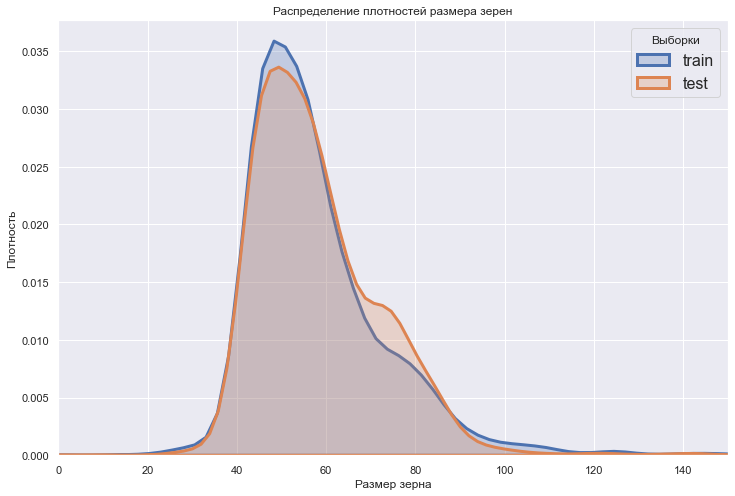

In [30]:
sns.set(rc={'figure.figsize':(12, 8)})
fig, ax = plt.subplots()

sns.distplot(data_train['rougher.input.feed_size'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 3},
                 label = 'train')

sns.distplot(data_test['rougher.input.feed_size'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 3},
                 label = 'test')

plt.legend(prop={'size': 16}, title = 'Выборки')
plt.title('Распределение плотностей размера зерен')
plt.xlabel('Размер зерна')
plt.ylabel('Плотность')
ax.set_xlim(0, 150)
plt.show()

Итак - формы распределений похожи, и пики расположены недалеко друг от друга. Можно принять, что распределения размера гранул на тестовой и тренировочной выборках равны. <br>

### Суммарная концентрация веществ на разных стадиях

Теперь рассмотрим суммарные концентрации веществ. А точнее распределения суммарных концентраций по стадиям технологического процесса.

In [31]:
spisok = [
    'rougher.input.feed_sum',
    'rougher.output.concentrate_sum',
    'primary_cleaner.output.concentrate_sum',
    'final.output.concentrate_sum'
]

for col in spisok:
    data_full[col] = (data_full[col.replace('_sum', '_ag')]
    + data_full[col.replace('_sum', '_pb')]
    + data_full[col.replace('_sum', '_au')]
    + data_full[col.replace('_sum', '_sol')]
                )

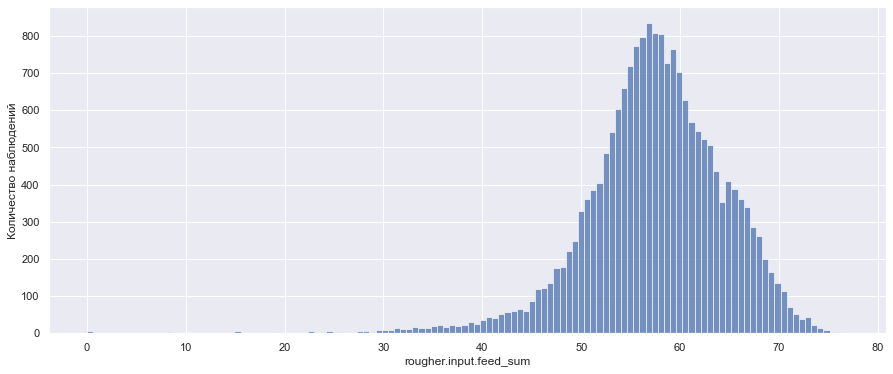

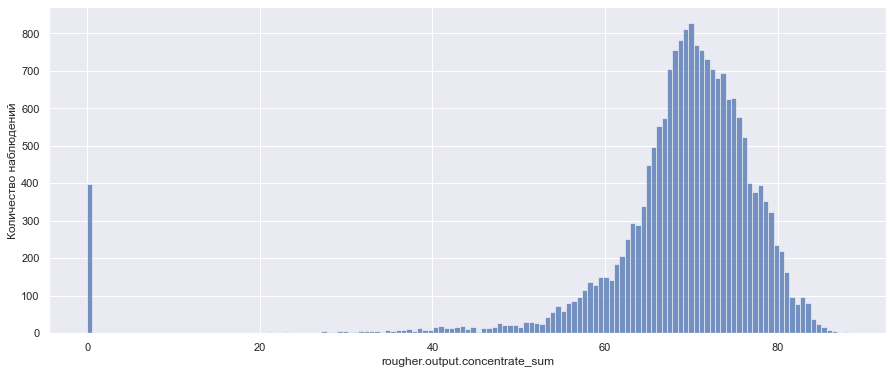

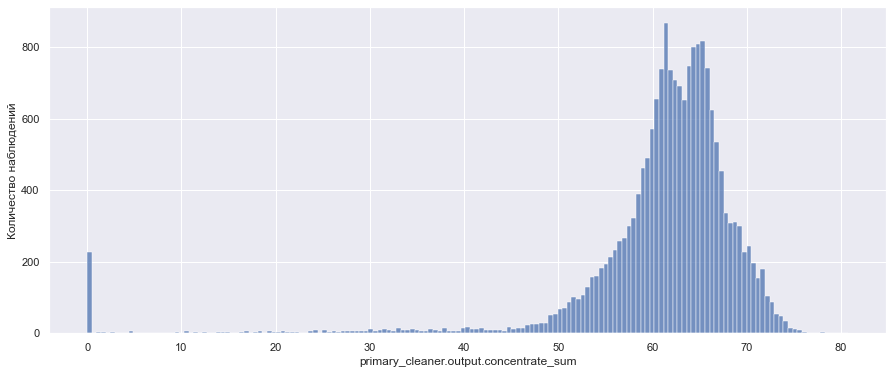

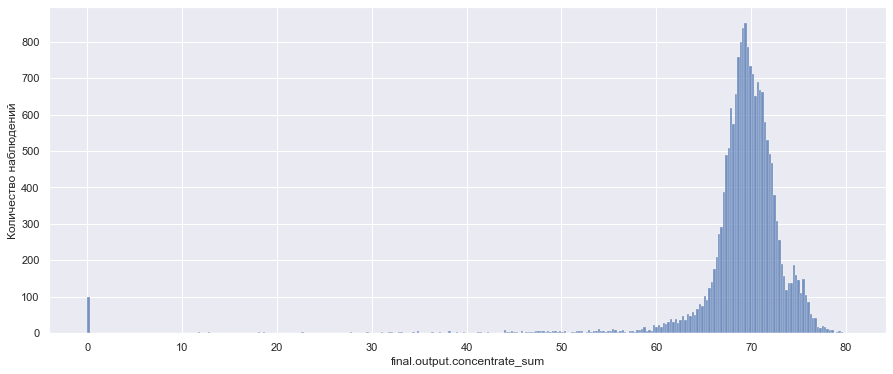

In [32]:
sns.set(rc={'figure.figsize':(15, 6)})
for col in spisok:
    sns.histplot(data=data_full, x=col)
    plt.ylabel('Количество наблюдений')
    plt.show()

Как мы видим, на каждом этапе присутствуют значения с концентрацией, равной нулю. Их стоит удалить.

In [33]:
for col in spisok:
    data_full = data_full[data_full[col] > 0]

После удаления следует обновить тренировочную и тестовую выборки.

In [34]:
data_train = data_train.set_index('date')
data_full = data_full.set_index('date')
data_train = data_train.loc[data_train.index.isin(data_full.index)]

In [35]:
data_test = data_test.set_index('date')
data_test = data_test.loc[data_test.index.isin(data_full.index)]

## Модель

На этом этапе мы можем приступить к обучению и сравнению моделей машинного обучения для нашей задачи регрессии. В качестве метрики оценки качества модели используем *sMAPE* (*Symmetric Mean Absolute Percentage Error*), рассчитываемый следующим образом: <br>
$$ \frac{1}{N}\sum_{i=1}^{N}\frac{|y_{i}-\hat{y_{i}}|}{|y_{i}|+|\hat{y_{i}}|} $$

sMAPE необходимо вычислить для чернового и финального этапа. Итоговая sMAPE вычисляется следующим образом: <br>
<h1><center>sMAPE (Итоговая) = 0.25 * sMAPE (черновая) + 0.75 * sMAPE (финальная)</center></h1>

Для этого создадим функцию.

### Функция для вычисления sMAPE

In [36]:
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 
  
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) + 0.75 * calculate_smape(target_actual_final, target_predictions_final)

smape_scorer = make_scorer(calculate_final_smape, greater_is_better=False)

Также, мы создали оценщик *smape_scorer*, который затем передадим алгоритму кросс-валидации.

Чтобы модели обучались и делали оценки корректно, удалим в тренировочной выборке столбцы, которых нет в тестовой.

In [37]:
data_train = data_train.loc[:, data_test.columns]
mis_features = list(set(data_train.columns)-set(data_test.columns))
#mis_features.append('rougher.state.floatbank10_b_level')
for column in mis_features:
    try:
        data_test[column]
        print(f'Столбец {column} присутствует!')
    except:
        i = 0
print('Количество отсутствующих признаков:', len(mis_features))
sorted(mis_features)

Количество отсутствующих признаков: 0


[]

### Обучение моделей

Начнем с разделения выборок на признаки и целевые признаки.

In [38]:
x_train = data_train
y_train = data_full.loc[data_full.index.isin(data_train.index)][['rougher.output.recovery', 'final.output.recovery']]

x_test = data_test
y_test = data_full.loc[data_full.index.isin(data_test.index)][['rougher.output.recovery', 'final.output.recovery']]

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13462, 52)
(13462, 2)
(4442, 52)
(4442, 2)


Итого: у нас имеется тренировочная выборка с 13108 строками и тестовая с 5013 строками, а также 52 столбца признаков и 2 целевых.

In [40]:
col_transformer = make_column_transformer( (StandardScaler(), x_train.columns), remainder='passthrough')

Приступаем к обучению моделей.

Первая модель, которую мы обучим - *Ridge*. <br>
Это линейная модель, использующая метод наименьших квадратов. Эта модель решает модель регрессии, в которой функция потерь является линейной функцией наименьших квадратов, а регуляризация задается нормой l2. Также известна как регрессия хребта или регуляризация по Тихонову.

In [41]:
model_ridge = Ridge(random_state=STATE)

pipeline_ridge = make_pipeline(col_transformer, model_ridge)

param_grid_ridge = {
    'ridge__alpha': np.arange(0, 0.21, 0.01),
}

gs_ridge_pl = GridSearchCV(
    pipeline_ridge, 
    param_grid=param_grid_ridge, 
    scoring=smape_scorer, 
    n_jobs=-1
)

gs_ridge_pl.fit(x_train, y_train)

gs_ridge_best_score = gs_ridge_pl.best_score_ * -1
gs_ridge_best_params = gs_ridge_pl.best_params_

# лучшее значение RMSE на кросс-валидации
print(f'best_score: {gs_ridge_best_score}')
# лучшие гиперпараметры
print(f'best_params: {gs_ridge_best_params}')

best_score: 8.375161131232355
best_params: {'ridge__alpha': 0.2}


Следующая модель - хорошо известное дерево решений, используемое аналитиками с 1950-х годов.

In [42]:
model_tree = DecisionTreeRegressor(random_state=STATE)

pipeline_tree = make_pipeline(col_transformer, model_tree)

param_grid_tree = {
    'decisiontreeregressor__max_depth': range(2, 7, 1),
    'decisiontreeregressor__min_samples_split': (2, 3, 4, 5),
    'decisiontreeregressor__min_samples_leaf': (1, 2, 3, 4)
}

gs_tree_pl = GridSearchCV(
    pipeline_tree, 
    param_grid=param_grid_tree, 
    scoring=smape_scorer, 
    n_jobs=-1
)

gs_tree_pl.fit(x_train, y_train)

gs_tree_best_score = gs_tree_pl.best_score_ * -1
gs_tree_best_params = gs_tree_pl.best_params_

# лучшее значение RMSE на кросс-валидации
print(f'best_score: {gs_tree_best_score}')
# лучшие гиперпараметры
print(f'best_params: {gs_tree_best_params}')

best_score: 7.96556587625321
best_params: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}


И последняя - случайный лес.

In [43]:
model_rf = RandomForestRegressor(random_state=STATE)

pipline_rf = make_pipeline(col_transformer, model_rf)

param_grid_rf = {
    'randomforestregressor__n_estimators': range(50, 251, 50),
    'randomforestregressor__max_depth': range(2, 6),
    'randomforestregressor__min_samples_split': (2, 3, 4),
    'randomforestregressor__min_samples_leaf': (1, 2, 3, 4)
}

# получается достаточно много комбинаций гиперпараметров при переборе
# будем использовать RandomizedSearchCV, он работает на много быстрее
gs_rf = RandomizedSearchCV(
    pipline_rf, 
    param_distributions=param_grid_rf, 
    scoring=smape_scorer, 
    n_jobs=-1, 
    random_state=STATE
)

gs_rf.fit(x_train, y_train)

gs_rf_best_score = gs_rf.best_score_ * -1
gs_rf_best_params = gs_rf.best_params_
print(f'best_score: {gs_rf_best_score}')
print(f'best_params: {gs_rf_best_params}')

best_score: 7.8020736066398175
best_params: {'randomforestregressor__n_estimators': 250, 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__max_depth': 3}


И, для сравнения моделей, используем модель, которая предсказывает медианное значение целевого признака.

In [44]:
dr = DummyRegressor(strategy='median')
dr.fit(x_train, y_train)
dr_result = calculate_final_smape(y_train, dr.predict(x_train))
print(dr_result)

8.292846912508717


In [45]:
column=['sMAPE']

comparison_tabl = pd.DataFrame(index=column, columns=['Ridge', 'Decision Tree', 'RandomForestRegressor', 'Dummy Model'])

comparison_tabl['Ridge'] = gs_ridge_best_score
comparison_tabl['Decision Tree'] = gs_tree_best_score
comparison_tabl['RandomForestRegressor'] = gs_rf_best_score
comparison_tabl['Dummy Model'] = dr_result

comparison_tabl.T.style.highlight_min(
    color='yellowgreen',subset=column
).highlight_null(null_color='lightgrey').highlight_max(color='coral',subset=column)

,sMAPE
Ridge,8.375161
Decision Tree,7.965566
RandomForestRegressor,7.802074
Dummy Model,8.292847


Лучший результат показал Случайный Лес. Остается протестировать.

### Тестирование лучшей модели

Теперь мы проведем тестирование модели, показавшей лучший результат на тренировочной выборке.

In [46]:
best_model = gs_rf.best_estimator_
pred_test = best_model.predict(x_test)
result = calculate_final_smape(y_test, pred_test)
print(f'Результат sMAPE лучшей модели: {result}')

Результат sMAPE лучшей модели: 6.782122927716452


In [47]:
dr = DummyRegressor(strategy='median')
dr.fit(x_train, y_train)
dr_result = calculate_final_smape(y_test, dr.predict(x_test))
print(f'Результат константной модели:', dr_result)

Результат константной модели: 7.774625892118643


Модель Случайного Леса показала неплохой результат на тестовых данных! А сравнение с константной моделью позволило оценить, что наша модель делает прогнозы лучше, чем предсказание по медианному значению.

## Вывод
В ходе выполнения проекта была решена поставленная цель - подготовлена модель машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды. <br>
<br>
В нашем распоряжении были данные с параметрами добычи и очистки. В ходе создания модели были выполонены следующие задачи: <br>
1) Подготовка данных. Данные были очищены от пропусков, проверены на дубликаты. <br>
2) Анализ данных. Были исследованы концентрации элементов на разных этапах технологического процесса очистки золота, распределения размеров гранул в тренировочной и тестовой выборках, суммарные концентрации веществ на разных этапах. <br>
3) Создание функции для оценки и обучение нескольких моделей машинного обучения. В ходе работы над этим этапам были исследованы такие модели, как *ridge*, *DecisionTree* и *RandomForest*. <br>
4) Выбор лучшей модели. Среди обученных моделей лучше всех себя показала модель *RandomForest*. Она также была протестирована на отдельной выборке и показала результат не хуже, чем на тренировочной. <br>
<br>
Это был нерпостой проект. В ходе его реализации приходилось разбираться в значении признаков, которых в данных достаточно много, пробовать разные способы визуализации данных для их наглядной подачи и написать функцию для расчета метрики оценки модели. <br>
В итоге удалось достичь итогового sMAPE 6.78 % на тестовых данных.